<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1" data-toc-modified-id="Chapter-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1</a></span></li></ul></div>

## Chapter 1

In [6]:
import pandas as pd

df = pd.DataFrame([0,1,2,3,4,5,6,7])
(df.info(), df.memory_usage())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
0    8 non-null int64
dtypes: int64(1)
memory usage: 144.0 bytes


(None, Index    80
 0        64
 dtype: int64)

In [27]:
import psutil, os

def memory_footprint():
    return psutil.Process(os.getpid()).memory_info().rss / 1024**2

df = pd.read_csv('weatherdata/ATL.csv')
df.info()

celsius = df['Max TemperatureF'].astype('float').values
celsius -= 32.0
celsius *= (5/9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
Date                         366 non-null object
Max TemperatureF             366 non-null int64
Mean TemperatureF            366 non-null int64
Min TemperatureF             366 non-null int64
Max Dew PointF               366 non-null int64
MeanDew PointF               366 non-null int64
Min DewpointF                366 non-null int64
Max Humidity                 366 non-null int64
Mean Humidity                366 non-null int64
Min Humidity                 366 non-null int64
Max Sea Level PressureIn     366 non-null float64
Mean Sea Level PressureIn    366 non-null float64
Min Sea Level PressureIn     366 non-null float64
Max VisibilityMiles          366 non-null int64
Mean VisibilityMiles         366 non-null int64
Min VisibilityMiles          366 non-null int64
Max Wind SpeedMPH            366 non-null int64
Mean Wind SpeedMPH           366 non-null int64
Max Gust SpeedMPH       

In [33]:
# Print the size in MB of the celsius array
print(celsius.nbytes / (1024**2))

# Call memory_footprint(): before
before = memory_footprint()

# Convert celsius by multiplying by 9/5 and adding 32: fahrenheit
fahrenheit = (celsius * 9/5) + 32

# Call memory_footprint(): after
after = memory_footprint()

# Print the difference between after and before
print(after - before)

0.0027923583984375
0.0


In [40]:
# Create empty list: dfs
dfs = []

# Loop over 'WDI.csv'
for chunk in pd.read_csv('WDI.csv', chunksize=1000):
    # Create the first Series
    is_urban = chunk['Indicator Name'] == 'Urban population (% of total)'
    # Create the second Series
    is_AUS = chunk['Country Code'] == 'AUS'

    # Create the filtered chunk: filtered
    filtered  = chunk.loc[is_urban & is_AUS]

    # Append the filtered chunk to the list dfs
    dfs.append(filtered)


In [43]:
import matplotlib.pyplot as plt

92
36


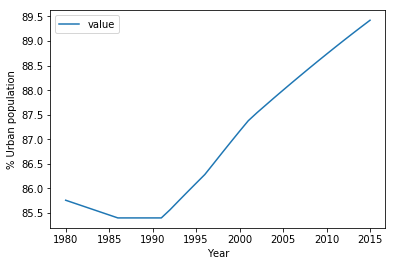

In [44]:
# Print length of list dfs
print(len(dfs))

# Apply pd.concat to dfs: df
df = pd.concat(dfs)

# Print length of DataFrame df
print(len(df))

# Call df.plot.line with x='Year' and y='value'
df.plot.line(x='Year', y='value')
plt.ylabel('% Urban population')

# Call plt.show()
plt.show()

In [45]:
# Define function with single input called df: pct_delayed
def pct_delayed(df):
    # Compute number of delayed flights: n_delayed
    n_delayed = (df['DEP_DELAY']>0).sum()
    # Return percentage of delayed flights
    return n_delayed  * 100 / len(df)

In [50]:
filenames = ['flightdelays-2016-1.csv',
 'flightdelays-2016-2.csv',
 'flightdelays-2016-3.csv',
 'flightdelays-2016-4.csv',
 'flightdelays-2016-5.csv',]

x = [1,2,3,4,5]

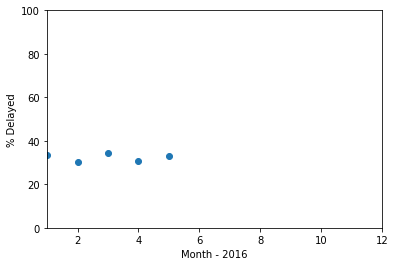

In [53]:
# Define the generator: dataframes
dataframes = (pd.read_csv('flightdelays/'+file) for file in filenames)

# Create the list comprehension: monthly_delayed
monthly_delayed = [pct_delayed(df) for df in dataframes]

# Create the plot
x = range(1,6)
plt.plot(x, monthly_delayed, marker='o', linewidth=0)
plt.ylabel('% Delayed')
plt.xlabel('Month - 2016')
plt.xlim((1,12))
plt.ylim((0,100))
plt.show()

In [54]:
from dask import delayed

In [56]:
# Define count_flights
@delayed
def count_flights(df):
    return len(df)

# Define count_delayed
@delayed
def count_delayed(df):
    return (df['DEP_DELAY']>0).sum()

# Define pct_delayed
@delayed
def pct_delayed(n_delayed, n_flights):
    return 100 * sum(n_delayed) / sum(n_flights)

In [71]:
n_delayed = []
n_flights = []

@delayed
def read_one(file):
    return pd.read_csv(file)

In [72]:

# Loop over the provided filenames list and call read_one: df
for file in filenames:
    df = read_one('flightdelays/'+file)

    # Append to n_delayed and n_flights
    n_delayed.append(count_delayed(df))
    n_flights.append(count_flights(df))

# Call pct_delayed with n_delayed and n_flights: result
result = pct_delayed(n_delayed, n_flights)

# Print the output of result.compute()
print(result.compute())

32.406252934201824
